# Determinacion Constnte de Rydberg

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('hidrogeno.csv')

# Calculo de $\lambda$


In [2]:
grad =  np.pi/180
np.sin(90 * grad)

lpm = 600000 # 6000 lin / cm = 600000 lin / 

In [3]:
def lambdda(m, ang, bias = 0):
    """
    ang: angulo en grados
    m: orden
    asume bias hacia la izquierda, osea que si tengo 2 grados de bias, al medir 
    2 grados hacia la derecha, estoy midiendo 0
    """

    d = 1/lpm
    lam= d*np.sin(np.abs(ang - bias)* np.pi/180)/m
    print(str(lam * 10**9) + " [nm]")
    return lam * 10**9

In [4]:
df['promedio'] = (df['theta_der'] + df['theta_izq'])/2

In [13]:

df['lambda'] = lambdda(df.orden ,df[df['orden']==df.orden]['promedio'])

0    421.522913
1    443.995580
2    499.789017
3    669.912961
4    439.129830
5    493.930215
6    669.880717
dtype: float64 [nm]


In [14]:
df['color'] = ['violeta','violeta', 'celeste', 'rojo','violeta','celeste','rojo']

In [16]:
df

,theta_der,theta_izq,orden,promedio,lambda,color
0,14.4,14.9,1,14.65,421.522913,violeta
1,15.4,15.5,1,15.45,443.995580,violeta
2,17.4,17.5,1,17.45,499.789017,celeste
3,23.4,24.0,1,23.70,669.912961,rojo
4,31.9,31.7,2,31.80,439.129830,violeta
5,36.2,36.5,2,36.35,493.930215,celeste
6,53.4,53.6,2,53.50,669.880717,rojo


In [17]:
df.to_csv('hidrogeno_lambdas.csv')

# Calcula $R_H$
Serie de Balmer inversa

$$
\frac{1}{\lambda} = R_H  (\frac{1}{2^2} - \frac{1}{n^2})
$$

$$
R_H = \frac{1}{\lambda} (\frac{4 n ^2}{n^2 - 4}) = 10 973 731.6 [m^{-1}]
$$

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

realR = 10973731.6 # rydberg constante R_\infty
realRh = 1.09678 * 10**7

# serie de balmer
def Rh(lambdad, n):
    longitudvacio = 1.00027717 * lambdad
    rh = (4*n*n)/(longitudvacio * (n*n - 4)) # 10**-9 [1/m]
    return rh * 10**9 # lo retorna en # [1/m]

In [22]:
datahidro = pd.read_csv('hidrogeno_lambdas.csv', index_col=0)
datahidro

,theta_der,theta_izq,orden,promedio,lambda,color
0,14.4,14.9,1,14.65,421.522913,violeta
1,15.4,15.5,1,15.45,443.995580,violeta
2,17.4,17.5,1,17.45,499.789017,celeste
3,23.4,24.0,1,23.70,669.912961,rojo
4,31.9,31.7,2,31.80,439.129830,violeta
5,36.2,36.5,2,36.35,493.930215,celeste
6,53.4,53.6,2,53.50,669.880717,rojo


In [29]:
# Hidrogeno rojo 3->2
Rh3_2 = Rh(datahidro['lambda'][3],3)

# Hidrogeno azul verde 4->2
Rh4_2 = Rh(datahidro['lambda'][2],4)

# Hidrogeno violeta 5->2
Rh5_2 = Rh(datahidro['lambda'][1],5)

# Hidrogeno violeta 6->2
Rh6_2 = Rh(datahidro['lambda'][0],6)

In [71]:
rhdf = pd.DataFrame({
    'E0': [3,4,5,6],
    'Rh': [Rh3_2, Rh4_2, Rh5_2, Rh6_2],
})

rhdf['error_percent'] = 100 *  (rhdf.Rh - realRh)/ realRh

rhdf

,E0,Rh,error_percent
0,3,1.074469e+07,-2.034257
1,4,1.066821e+07,-2.731517
2,5,1.072215e+07,-2.239778
3,6,1.067262e+07,-2.691350


# Plot de Rh para el Hidrogeno

In [72]:
import seaborn as sns

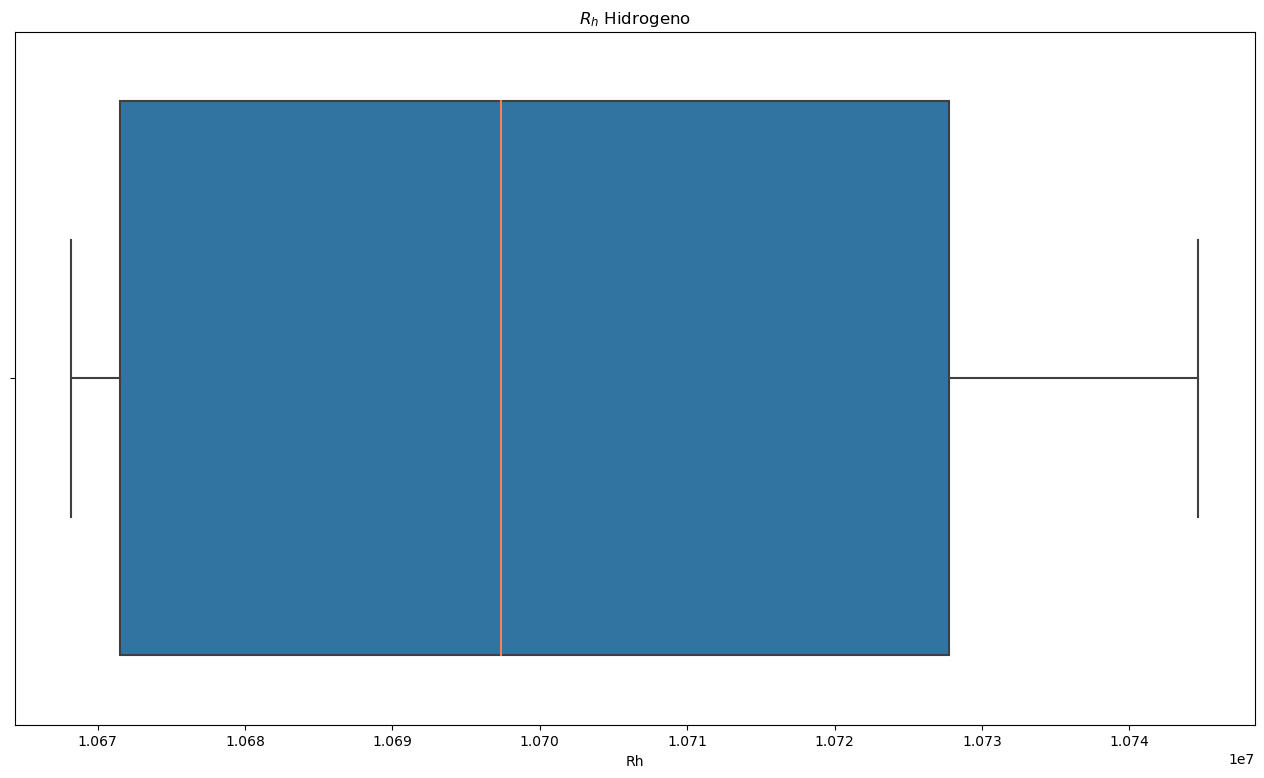

In [73]:
fig, ax = plt.subplots(figsize=(16,9))
plt.title(r'$R_h$ Hidrogeno')
sns.boxplot(
    x=rhdf.Rh, ax=ax, medianprops={"color": "coral"}
    )
plt.show()

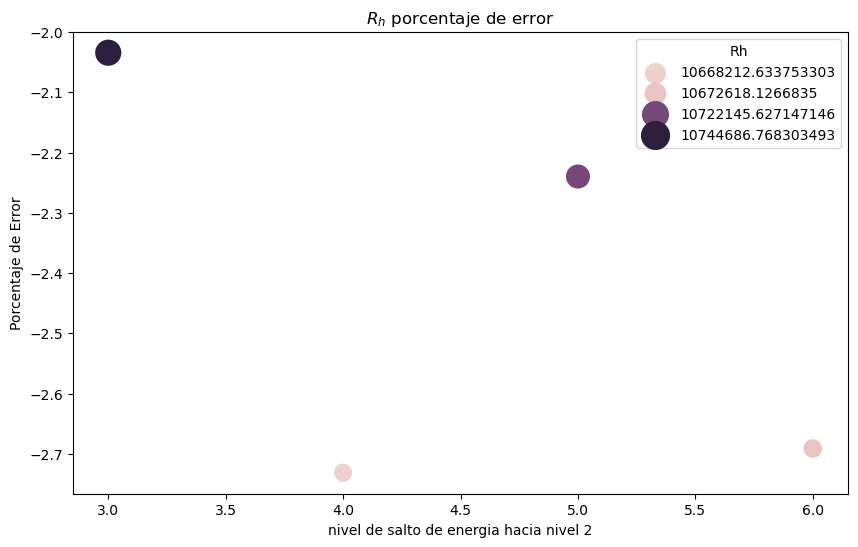

In [74]:
fig, ax = plt.subplots(figsize=(10,6))
plt.title(r'$R_h$ porcentaje de error')
sns.scatterplot(
    ax=ax, data=rhdf,
    y="error_percent", x="E0", size="Rh", sizes= (200,400), hue="Rh"
    )
ax.set_xlabel("nivel de salto de energia hacia nivel 2")
ax.set_ylabel("Porcentaje de Error")
plt.show()

# Analisis Comparativo
Utilizando la constante de Rydberg para mas elementos como una aproximación.

donde podemos entonces obtener la constante de Rydberg 
$$
R = \frac{m_e Z^2 e^4}{8 \varepsilon_0^2 h^3 c} 
$$


In [38]:
# leer los datos obtenidos
import pandas as pd
import numpy as np

vaporagua = pd.read_csv("./vaporagua.csv")
hidrogeno = pd.read_csv("./hidrogeno.csv")
#vaporagua['lambda m']

hidrogeno["lambda m"] = hidrogeno["lambda nm"] * 1e-9


# aunque es mejor trabajr en nanometros para alejarnos del machep
vaporagua["lambda nm"] = vaporagua["lambda m"] * 1e9
vaporagua
#hidrogeno

,color,D,lambda m,lambda nm
0,violeta,25.85,4.375980e-07,437.598
1,celeste,29.75,4.980780e-07,498.078
2,verde,32.75,5.431900e-07,543.190
3,roja ten,37.50,6.119440e-07,611.944
4,roja main,41.50,6.671880e-07,667.188


In [18]:
# tener cuidado con 10ealgo, ya que esta algo raro
10e-09 == 10 * 1e-09

#1e-09 * 10**9

True

In [56]:
# ejemplo de machine error
# ocurre en floats
abs(3.3 - 3.31 + 0.01) 

2.3071822230491534e-16

In [53]:
# Algoritmo de Similitud Aplicado
# corre un for internamente
 # funcion para buscar match dentro de un porcentaje de error
def epsilon_difference(x, datapoint, epsilon):
    #print("Difference is:", abs( 1 - x / datapoint))
    if(abs(1 - x / datapoint) <= epsilon ):
        #print("... match")
        return x, datapoint 
    else:
        #print("No data matching conditions")
        return 0, 0

def epsilon_loop(comparewith, data, epsilon=0.005, epsilonLimit=0.2):    
    while (epsilon <= epsilonLimit):
        #print("epsilon:",epsilon)
        Ndata = len(data)
        x = np.zeros(Ndata)
        dataR = np.zeros(Ndata)

        for jth, datapoint in enumerate(data):
            #print(datapoint)
            x[jth], dataR[jth] = epsilon_difference(comparewith , datapoint, epsilon)

        x = x[x > 1e-16] # sobre el machine error, 10e-16 se debe ver como 0
        dataR = dataR[dataR > 1e-16]
        if (len(x) > 0):
            #print(x, dataR)
            return x, dataR, epsilon
        elif (epsilon <= epsilonLimit):
            #print(epsilon)
            epsilon += 0.005 
        else:
            break


In [55]:
# para comparar dos arreglos, entonces comenzamos a hacer un loop
comparedata = hidrogeno["lambda nm"]
data = vaporagua["lambda nm"]

x = np.zeros(len(data))
dataResult = np.zeros(len(data))
epsilon_DF = np.zeros(len(data))

for ith, datapoint in enumerate(data):
    #print("ith", ith)
    z = epsilon_loop(datapoint, comparedata)
    x[ith], dataResult[ith], epsilon_DF[ith]  = z[0], z[1], z[2]

print(x, dataResult)



[437.598 498.078 543.19  611.944 667.188] [443.99558037 499.78901677 499.78901677 669.91296109 669.91296109]


### convirtiendolo en una funcion

In [63]:
def compara2df(dfsmall, dfbig, epsilon=0.005, epsilonLimit=0.2):
    """
    compara dos dataframes mediante diferencias porcentuales de epsilon,
    se ha de utilizar pandas Series, por tanto si tiene un array, corta
    la seccion importante con un slicing

    dfbig = vapor_agua["lambdas nm"]
    df = hidrogeno["lambdas nm"]
    """
    x = np.zeros(len(dfbig))
    dataResult = np.zeros(len(dfbig))
    epsilon_DF = np.zeros(len(dfbig))

    for ith, datapoint in enumerate(dfbig):
        #print("ith", ith)
        z = epsilon_loop(datapoint, dfsmall, epsilon, epsilonLimit)
        x[ith], dataResult[ith], epsilon_DF[ith]  = z[0], z[1], z[2]

    return x, dataResult, epsilon_DF


In [65]:
df = hidrogeno["lambda nm"]
x, dataResult, epsilon_DF = compara2df(dfsmall = df, dfbig=vaporagua["lambda nm"])

In [67]:
comparacion = pd.DataFrame(
    {
        "hidrogeno": x,
        "vapor agua": dataResult,
        "epsilon algorithm": epsilon_DF
    }
)
comparacion
# comparacion.to_csv("./epsilon_agua_hidrogeno.csv")

,hidrogeno,vapor agua,epsilon algorithm
0,437.598,443.995580,0.015
1,498.078,499.789017,0.005
2,543.190,499.789017,0.090
3,611.944,669.912961,0.090
4,667.188,669.912961,0.005


In [63]:
# agua
#Z = 10

# Hg
Z = 80

Rz = Z*Z * 1.09678 * 10**7


def longitudOnda(n,m): #m > n
    return (1)/(Rz * (  1/n**2  - 1/m**2 ))

epsilon = 0.1

print('n','m', 'lambda [m]')
for n in range(1, 5):
    for m in range(n+1, n+6):   
        print(n,m, longitudOnda(n, m))
        for datapoint in vaporagua['lambda m']:
            epsilon_difference( longitudOnda(n, m), datapoint, epsilon )

n m lambda [m]
1 2 1.8994997477464337e-11
1 3 1.6027029121610535e-11
1 4 1.519599798197147e-11
1 5 1.4839841779269012e-11
1 6 1.465328376832963e-11
2 3 1.0257298637830741e-10
2 4 7.597998990985735e-11
2 5 6.783927670522977e-11
2 6 6.410811648644214e-11
2 7 6.205032509305016e-11
3 4 2.930656753665926e-10
3 5 2.003378640201317e-10
3 6 1.7095497729717902e-10
3 7 1.570648853917832e-10
3 8 1.4919707109571988e-10
4 5 6.331665825821445e-10
4 6 4.1029194551322966e-10
4 7 3.3845631868936446e-10
4 8 3.039199596394294e-10
4 9 2.8404826997069745e-10


In [64]:
# agua
#Z = 10

# Hg
Z = 80

Rz = Z*Z * 1.09678 * 10**7

def longitudOnda(n,m): #m > n
    lmb = (10**9)/(Rz * (  1/n**2  - 1/m**2 ))
    return n, m, lmb


print('n','m', 'lambda [m]')
for n in range(1, 5):
    for m in range(n+1, n+6):   
        print(n,m, longitudOnda(n, m))

n m lambda [m]
1 2 (1, 2, 0.018994997477464335)
1 3 (1, 3, 0.016027029121610536)
1 4 (1, 4, 0.015195997981971469)
1 5 (1, 5, 0.014839841779269012)
1 6 (1, 6, 0.01465328376832963)
2 3 (2, 3, 0.10257298637830742)
2 4 (2, 4, 0.07597998990985734)
2 5 (2, 5, 0.06783927670522977)
2 6 (2, 6, 0.06410811648644214)
2 7 (2, 7, 0.06205032509305016)
3 4 (3, 4, 0.2930656753665926)
3 5 (3, 5, 0.20033786402013168)
3 6 (3, 6, 0.170954977297179)
3 7 (3, 7, 0.15706488539178323)
3 8 (3, 8, 0.1491970710957199)
4 5 (4, 5, 0.6331665825821445)
4 6 (4, 6, 0.41029194551322967)
4 7 (4, 7, 0.3384563186893645)
4 8 (4, 8, 0.30391995963942936)
4 9 (4, 9, 0.28404826997069743)


In [31]:
# para ordenar los datos
# el algoritmo Merge sort

# divide en dos grupos
# divide en grupos
# ...
# al llegar al tamaño de 1 de grupo, toma el primer par
# si x0 < x1 entonces toma el siguiente par x1< x2,
    # else: (osea x2< x1, desorden)
    # entonces x1, x2 = x2, x1

lista = [1,2,4,2,1,4]

## por terminar
def mergesort(lista):
    N = len(lista)
    if N > 2: 
        print(lista)
        return mergesort(lista[:(N//2)]) + mergesort(lista[(N//2):])

    elif N == 2:
        if lista[0] > lista[1]:
            return [lista[1], lista[0]]
        else:
            return lista
    elif N==1:
        return lista

mergesort(lista)

[1, 2, 4, 2, 1, 4]
[1, 2, 4]
[2, 1, 4]


[1, 2, 4, 2, 1, 4]

In [24]:
mergesort([2,1])

[1, 2]

In [21]:
N = len(lista)

lista = mergesort(lista[(N//2):])
mergesort(lista[(N//2):])

[4]

In [15]:
N = len(lista)
lista[:(N//2)] + lista[(N//2):]


[1, 2, 4, 2, 1, 4]

[2, 1, 4]

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

realR = 10973731.6 # rydberg constante R_\infty
realRh = 1.09678 * 10**7

# serie de balmer
def Rh(lambdad, n):
    longitudvacio = 1.00027717 * lambdad
    rh = (4*n*n)/(longitudvacio * (n*n - 4)) # 10**-9 [1/m]
    return rh * 10**9 # lo retorna en # [1/m]